In [23]:
%matplotlib inline
import scipy.stats.mstats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from cribbage.netbuilder import Model

2017-02-04 15:24:45,403 INFO: weights loaded from snapshot 0002255999.npz
2017-02-04 15:24:45,513 INFO: weights loaded from snapshot 0001001999.npz
2017-02-04 15:24:45,622 INFO: weights loaded from snapshot 0001439999.npz


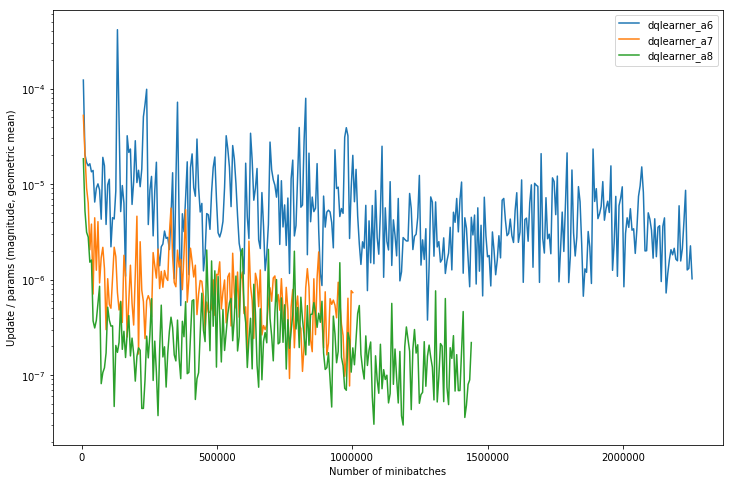

In [24]:
plt.clf()
plt.figure(figsize=(12, 8))
plt.semilogy()
for x in [6,7,8]:
    model = Model('models', 'dqlearner_a{}'.format(x))

    df=pd.DataFrame(model.metadata['snapshots'])
    df['pm_mean'] = scipy.stats.mstats.gmean(np.array([x for x in df['param_mags']]), axis=1)
    df['um_mean'] = scipy.stats.mstats.gmean(np.array([x for x in df['update_mags']]), axis=1)
    #df['pm_mean'] = np.array([x for x in df['param_mags']]).mean(axis=1)
    #df['um_mean'] = np.array([x for x in df['update_mags']]).mean(axis=1)
    df['umm_by_pmm'] = df['um_mean'] / df['pm_mean']

    plt.plot(df['num_minibatches'], df['umm_by_pmm'], label=model.model_name)

plt.xlabel('Number of minibatches')
plt.ylabel('Update / params (magnitude, geometric mean)')
plt.legend()

In [29]:
def plot_training(model_name='dqlearner_a5'):
    '''Wrap code to plot the training and validation error of a given model.'''
    model = Model('models', model_name)
    plt.clf()
    #plt.figure()
    data = [[ss['num_minibatches'], ss['train_err'], ss['validation_err']] for ss in
            model.metadata['snapshots']]
    data = np.array(data).T
    fig, ax1 = plt.subplots(figsize=(12, 8))
    ax1.plot(data[0], data[1], label='Training Error', color='C0')
    ax2 = plt.twinx()
    ax2.plot(data[0], data[2], label='Validation Error', color='C1')
    ax1.set_xlabel('Number of minibatches')
    ax1.set_ylabel('Mean squared training error per minibatch')
    ax1.tick_params('y', colors='C0')
    ax2.set_ylabel('Validation error per minibatch')
    ax2.tick_params('y', colors='C1')
    #fig.legend()
    plt.title(model.model_name)
    fig.tight_layout()
    fig.show()

2017-02-04 15:25:20,717 INFO: weights loaded from snapshot 0001565999.npz


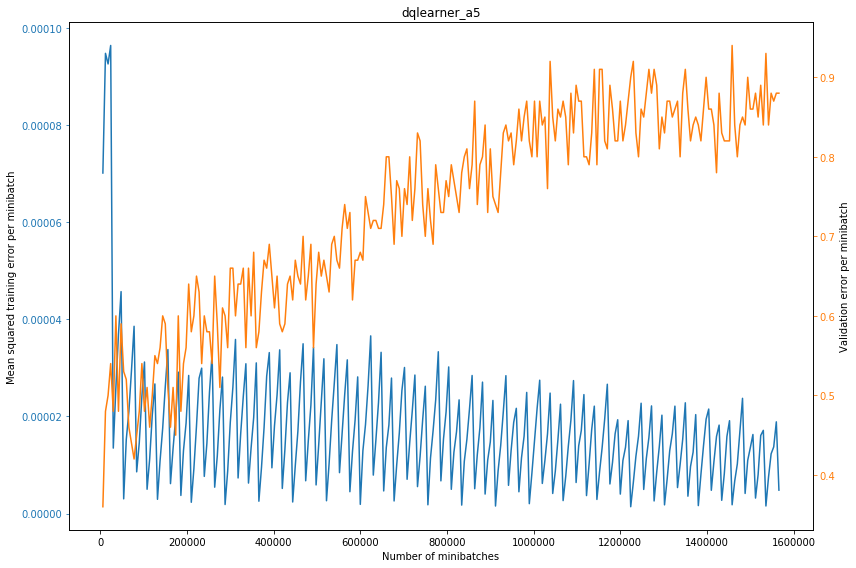

In [30]:
plot_training('dqlearner_a5')

2017-02-04 15:25:23,221 INFO: weights loaded from snapshot 0002255999.npz


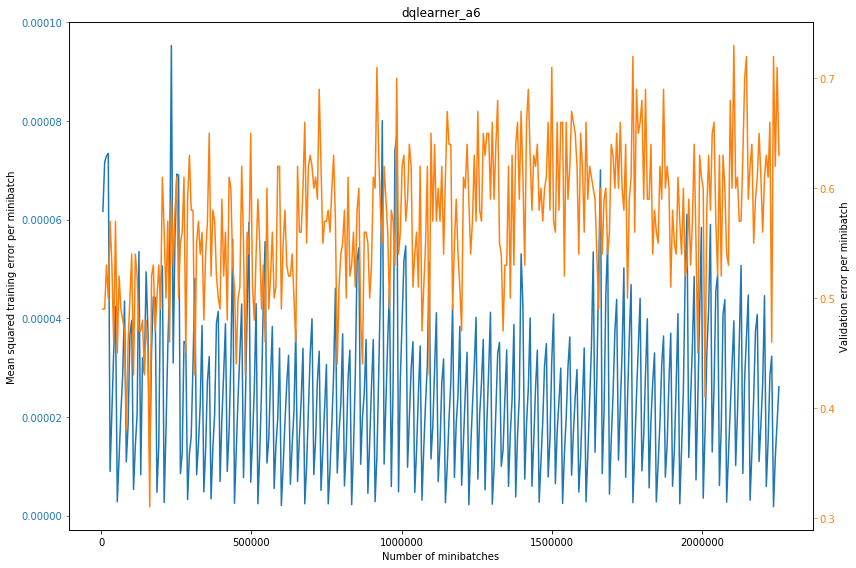

In [31]:
plot_training('dqlearner_a6')

2017-02-04 15:25:24,185 INFO: weights loaded from snapshot 0001001999.npz


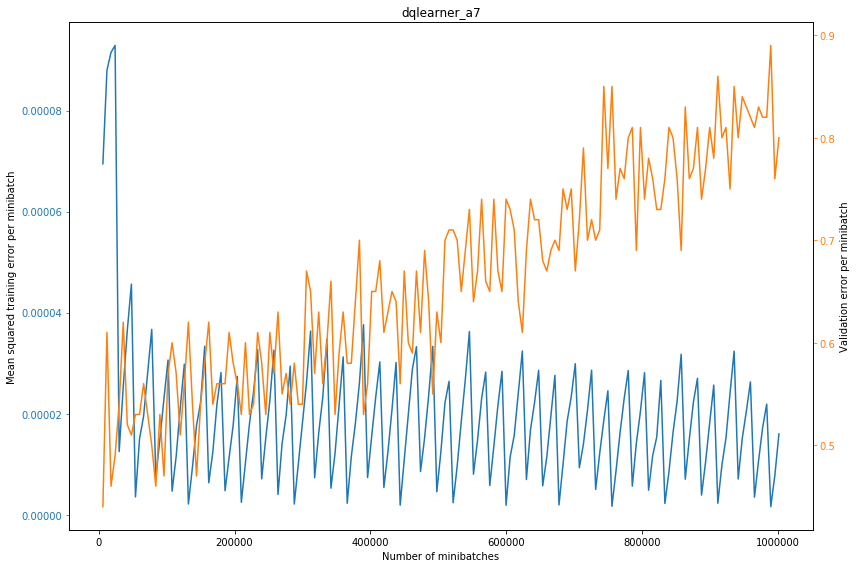

In [32]:
plot_training('dqlearner_a7')

2017-02-04 15:25:25,033 INFO: weights loaded from snapshot 0001439999.npz


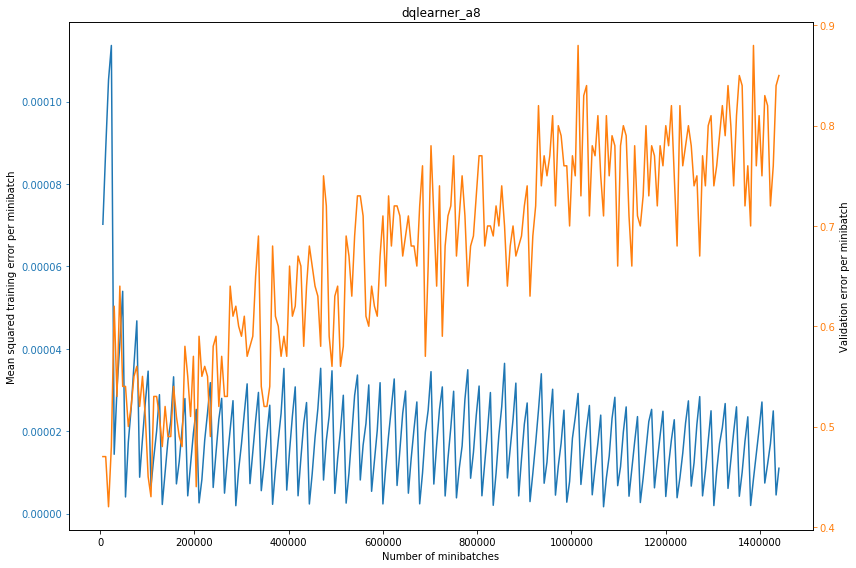

In [33]:
plot_training('dqlearner_a8')